Hourly Serial Dataframe Table:
                        voltage  current    power   energy  frequency        pf
time                                                                           
2023-03-24 09:00:00  229.366857  173.078  22211.2   35.482  49.983938  0.559254
2023-03-24 10:00:00  229.855238   82.220  10803.8   61.800  49.975863  0.218998
2023-03-24 11:00:00  231.853554   25.034   3372.1   67.001  49.984601  0.063037
2023-03-24 12:00:00  230.269217   49.708   6638.1   67.137  49.972320  0.125431
2023-03-24 13:00:00  227.578949   48.878   6544.0   74.282  49.974352  0.125475
2023-03-24 14:00:00  225.894417   14.036   1851.2   79.170  49.982463  0.034805
2023-03-24 15:00:00  227.575731   19.050   2535.4   79.170  49.981938  0.047593
2023-03-24 16:00:00  229.204729   62.358   8256.4   82.856  49.999967  0.155445
2023-03-24 17:00:00  231.931461  110.914  14306.8   88.734  49.992118  0.284305
2023-03-24 18:00:00  233.829946  205.729  26835.2  112.581  49.988803  0.558150
2023-03-2

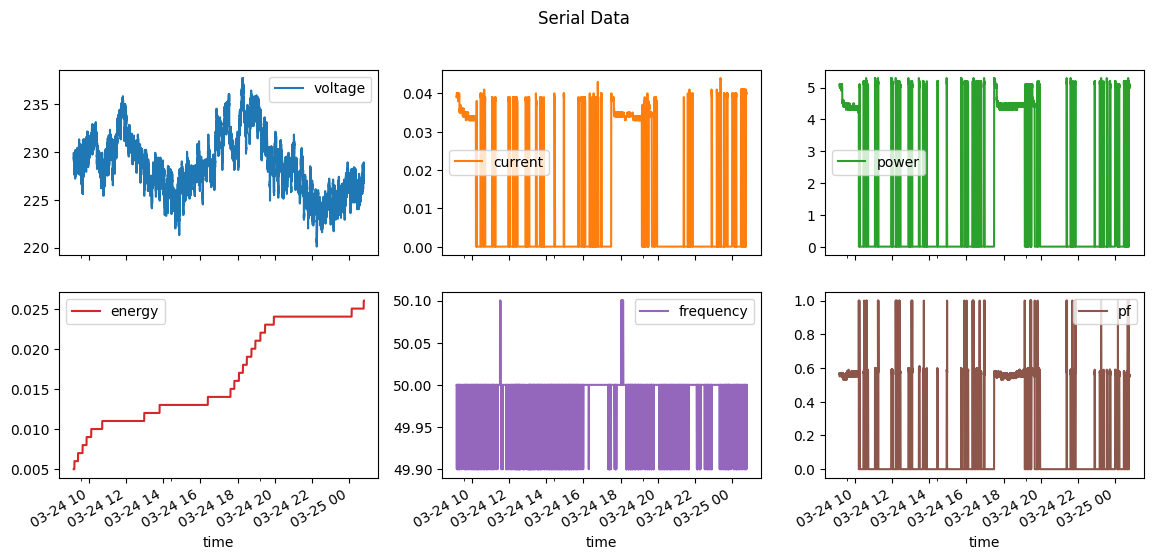

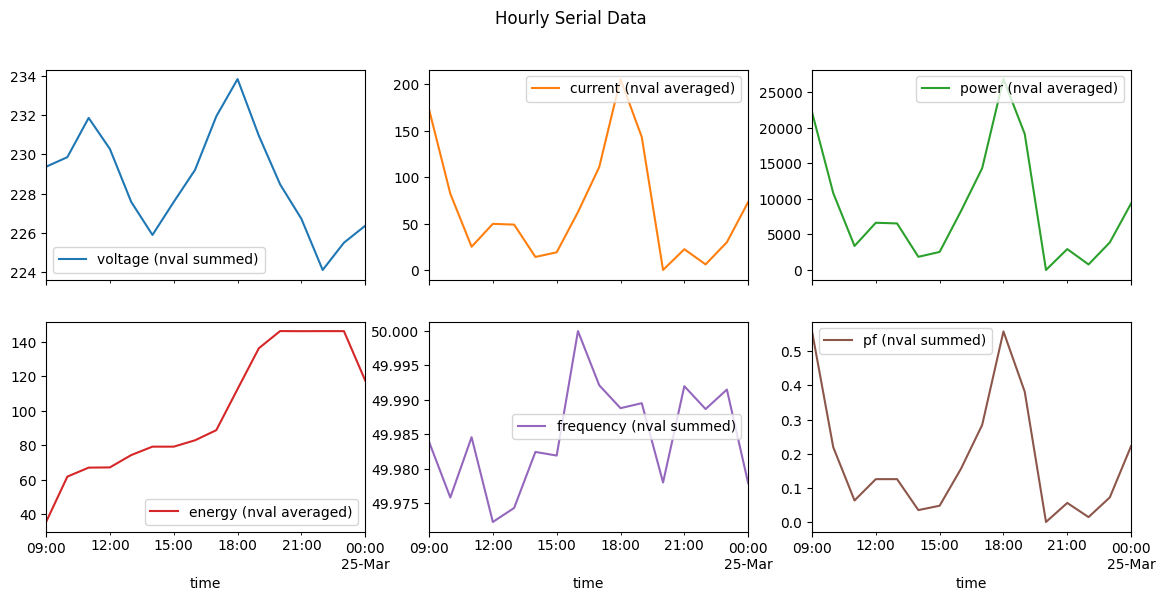

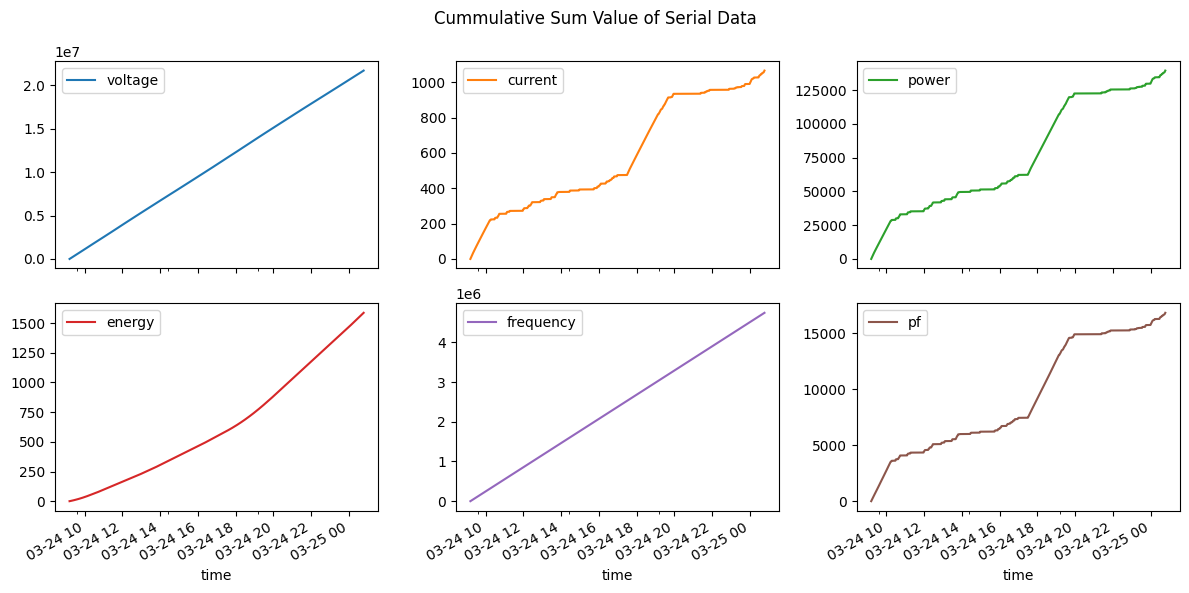

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

serial_data = pd.read_csv('../24-03-2023/serial_data.csv', index_col='time', parse_dates=True)
serial_data[['voltage', 'current', 'power', 'energy', 'frequency', 'pf']] = serial_data[['voltage', 'current', 'power', 'energy', 'frequency', 'pf']].apply(pd.to_numeric)

agg_func = {col: 'mean' if col == 'voltage' or col == 'frequency' or col == 'pf' else 'sum' for col in serial_data.columns}
hourly_data = serial_data.resample('H').agg(agg_func)

serial_data.plot(subplots=True, layout=(2, 3), figsize=(14,6), title='Serial Data')
axes = hourly_data.plot(subplots=True, layout=(2, 3), figsize=(14,6), title='Hourly Serial Data')
serial_data.cumsum().plot(subplots=True, layout=(2, 3), figsize=(12,6), title='Cummulative Sum Value of Serial Data')

# Add a custom legend to each subplot of hourly serial data
for ax0 in axes:
    for ax1 in ax0:
        # Get the existing legend
        legend = ax1.get_legend()

        # Get the text labels and legend handles
        texts = legend.get_texts()
        text_value = texts[0].get_text()

        if text_value == 'voltage' or text_value == 'frequency' or text_value == 'pf':
            texts[0].set_text(text_value + ' (nval summed)')
        else:
            texts[0].set_text(text_value + ' (nval averaged)')

pd.set_option('display.width', 1000)

print(f"Hourly Serial Dataframe Table:\n{hourly_data}\n")

average_value_non_zero = serial_data.apply(lambda x: x[x != 0].mean())
print(f"Average Value of Non Zero Values:\n{average_value_non_zero}")

plt.tight_layout()
plt.show()